In [16]:
#load library and create subsets
#library(dplyr)

samples <- read.table('both_samples_condition.tsv')

bsamples <- samples %>% filter(tissue == "brain")
#gsamples <- samples %>% filter(tissue == "gut")
#gundiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "undiff")
#gdiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "diff")

In [17]:
bsamples

,condition,replicate,organoid_stage,id,name,tissue
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
VL1,MLB2,1,4d,VL1,MLB2_brain_4d_VL1,brain
VL2,MLB2,2,4d,VL2,MLB2_brain_4d_VL2,brain
VL3,VA1,1,4d,VL3,VA1_brain_4d_VL3,brain
VL4,VA1,2,4d,VL4,VA1_brain_4d_VL4,brain
VL5,HAstV4,1,4d,VL5,HAstV4_brain_4d_VL5,brain
VL6,HAstV4,2,4d,VL6,HAstV4_brain_4d_VL6,brain
VL7,Mock,1,4d,VL7,Mock_brain_4d_VL7,brain
VL8,Mock,2,4d,VL8,Mock_brain_4d_VL8,brain


In [18]:
bpccounts = as.matrix(read.csv('../../output/brain/counts_protein_coding.csv',row.names = 1))
dim(bpccounts)

[1] 20070     8

In [32]:
#load genes (using gut_genes, since brain's one was confused)
ggenes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)
ggenes[1:4,]

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000279928,1,182696,184174,+,ENSG00000279928,DDX11L17,unprocessed_pseudogene
ENSG00000228037,1,2581560,2584533,+,ENSG00000228037,NA,lncRNA
ENSG00000142611,1,3069168,3438621,+,ENSG00000142611,PRDM16,protein_coding
ENSG00000284616,1,5301928,5307394,-,ENSG00000284616,NA,lncRNA


In [5]:
library(DESeq2)
colours = c(
    HAstV4='#ff9301',
    MLB2='#592bf5',
    VA1='#1fbd6b',
    mock='#919190')

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are m

In [19]:
#colnames(bpccounts) == rownames(bsamples)
bpccounts = bpccounts[,rownames(bsamples)]
bpccounts

,VL1,VL2,VL3,VL4,VL5,VL6,VL7,VL8
ENSG00000142611,362,678,397,488,622,578,342,466
ENSG00000157911,222,402,462,437,546,288,209,346
ENSG00000142655,92,206,256,298,232,143,190,223
ENSG00000149527,68,159,194,231,214,201,127,92
ENSG00000171621,22,44,90,107,16,55,65,46
ENSG00000142583,0,0,0,0,0,7,0,0
ENSG00000173614,45,143,181,59,124,119,87,80
ENSG00000162592,0,9,18,0,0,0,0,0
ENSG00000204624,169,483,321,294,219,393,379,300
ENSG00000142606,5,19,2,5,12,3,6,2


In [20]:
rownames(bsamples) = colnames(bpccounts) = bsamples$name
deseq = DESeqDataSetFromMatrix(countData = bpccounts,
                              colData = bsamples,
                               design = ~ condition)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 20070 8 
metadata(1): version
assays(1): counts
rownames(20070): ENSG00000142611 ENSG00000157911 ... ENSG00000268674
  ENSG00000277475
rowData names(0):
colnames(8): MLB2_brain_4d_VL1 MLB2_brain_4d_VL2 ... Mock_brain_4d_VL7
  Mock_brain_4d_VL8
colData names(6): condition replicate ... name tissue


FALSE  TRUE 
 4965 15105 

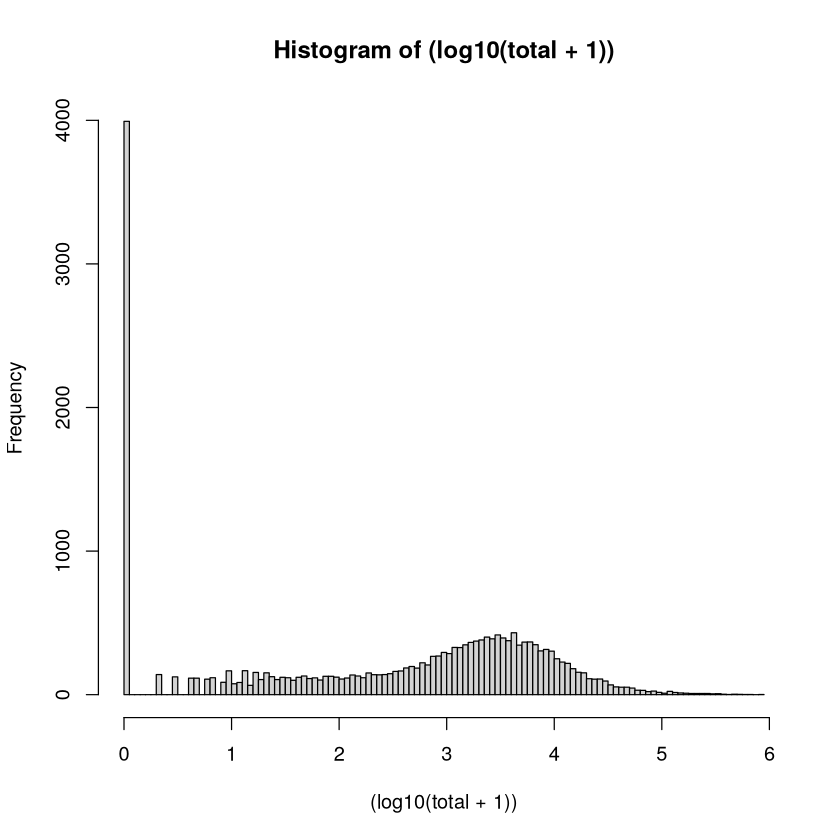

In [21]:
# filter genes by total read counts (true if >10 reads)
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)
total = rowSums(counts(deseq))
hist((log10(total + 1)),100)
table(total>=10)

In [22]:
# filter genes (Counting the number of samples where each gene has ≥10 reads (e.g., 459 genes have ≥10 reads in two samples))
nbsamples10 = rowSums(counts(deseq)>=10)
table(nbsamples10)

nbsamples10
    0     1     2     3     4     5     6     7     8 
 5325   952   459   347   320   304   317   488 11558 

In [23]:
dim(deseq)

[1] 20070     8

In [24]:
# remove genes with less than 10 reads in total in at least 2 samples.
deseq = deseq[nbsamples10>=2,]
deseq

class: DESeqDataSet 
dim: 13793 8 
metadata(1): version
assays(1): counts
rownames(13793): ENSG00000142611 ENSG00000157911 ... ENSG00000278817
  ENSG00000271254
rowData names(0):
colnames(8): MLB2_brain_4d_VL1 MLB2_brain_4d_VL2 ... Mock_brain_4d_VL7
  Mock_brain_4d_VL8
colData names(6): condition replicate ... name tissue

In [25]:
#pre-filtering, to keep genes that have at least 10 reads in 3 or more samples
smallestGroupSize <- 3
keep <- rowSums(counts(deseq) >= 10) >= smallestGroupSize
deseq <- deseq[keep,]

In [26]:
dim(deseq)

[1] 13334     8

all viruses together

In [27]:
deseq = DESeq(deseq)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [28]:
#deseq with where contrast using Mock/virus
cnds = c('MLB2','VA1','HAstV4')
res = lapply(cnds,function(c)results(deseq,contrast = c('condition',c, 'Mock'), independentFiltering=FALSE))
names(res) = cnds

In [29]:
res

$MLB2
log2 fold change (MLE): condition MLB2 vs Mock 
Wald test p-value: condition MLB2 vs Mock 
DataFrame with 13334 rows and 6 columns
                   baseMean log2FoldChange     lfcSE      stat     pvalue
                  <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSG00000142611    482.1434      0.4522028  0.259359  1.743538  0.0812397
ENSG00000157911    349.5208      0.2711253  0.322683  0.840223  0.4007834
ENSG00000142655    196.7115     -0.4217584  0.370446 -1.138514  0.2549057
ENSG00000149527    153.7660      0.0752374  0.426619  0.176357  0.8600133
ENSG00000171621     53.8773     -0.6991482  0.761632 -0.917961  0.3586394
...                     ...            ...       ...       ...        ...
ENSG00000198727 18042.62927      -0.274989  0.167249 -1.644185 0.10013796
ENSG00000276256    78.84019       0.996755  0.611706  1.629466 0.10321436
ENSG00000273748   123.86313      -1.421044  0.548607 -2.590275 0.00958992
ENSG00000278817   112.81590      -0.149468  0.495

In [30]:
saveRDS(res,'../../rds/deseq2_brain_mockvirus.rds')

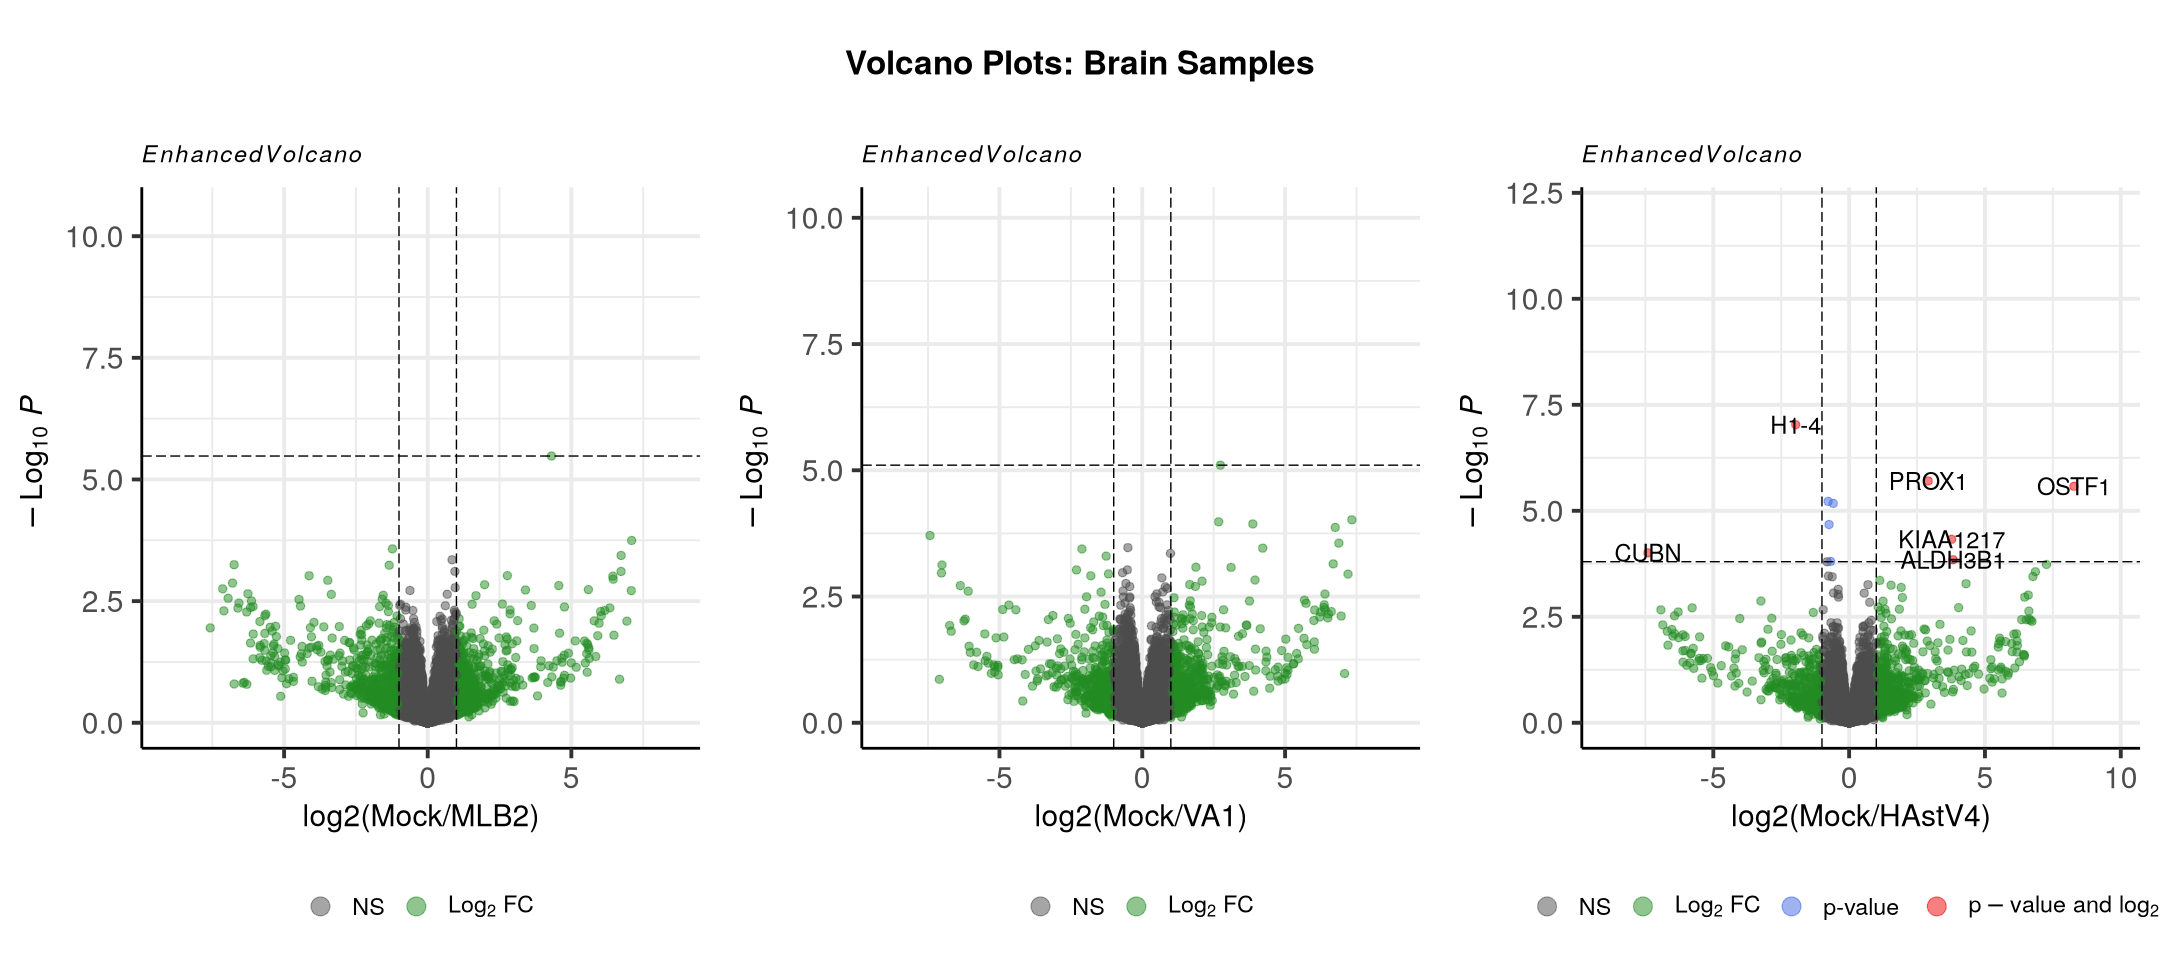

In [37]:
options(repr.plot.width = 18, repr.plot.height = 8)  # Increase height for legends

library(EnhancedVolcano)
library(cowplot)
library(ggplot2)  # Нужно для `ggdraw()`

plots = list()
for (vir_name in names(res)) {
    r = res[[vir_name]]
    pv_thr = max(r$pvalue[!is.na(r$padj) & r$padj<0.2])
    plots[[vir_name]] = EnhancedVolcano(r,
        lab = ggenes[rownames(r), 'gene_name'],
        x = 'log2FoldChange',
        y = 'pvalue',
        pCutoff = pv_thr,
        xlab = paste0('log2(Mock/', vir_name, ')'),
        title = NULL,  # Remove individual titles
        caption = NULL
    ) + theme(legend.position = "bottom")  # Move legend below each plot
}

# Create a common title with more space
title <- ggdraw() + draw_label("Volcano Plots: Brain Samples", 
                               fontface = 'bold', size = 20, hjust = 0.5)

# Arrange all plots in one row with enough space for the title & legends
final_plot <- plot_grid(title, 
                        plot_grid(plotlist = plots, nrow = 1, ncol = 3, 
                                  align = "hv", rel_widths = c(1.5, 1.5, 1.5)), 
                        ncol = 1, rel_heights = c(0.15, 1))  # More space for title

# Display the final plot
print(final_plot)

In [34]:
ggsave("06_volcano_brain.png", final_plot, width = 24, height = 10, dpi = 300)

In [96]:
#deseq with where contrast using virus/Mock
#cnds = c('MLB2','VA1','HAstV4')
#res = lapply(cnds,function(c)results(deseq,contrast = c('condition','Mock',c)))
#names(res) = cnds

In [97]:
sapply(res,function(x){
    c(sign=sum(x$padj<0.2 & abs(x$log2FoldChange)>0))
})

MLB2.sign    VA1.sign HAstV4.sign 
          1           1          11

In [98]:
#using gut_genes, since brain's one was confused.
ggenes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)
ggenes[1:4,]

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000279928,1,182696,184174,+,ENSG00000279928,DDX11L17,unprocessed_pseudogene
ENSG00000228037,1,2581560,2584533,+,ENSG00000228037,NA,lncRNA
ENSG00000142611,1,3069168,3438621,+,ENSG00000142611,PRDM16,protein_coding
ENSG00000284616,1,5301928,5307394,-,ENSG00000284616,NA,lncRNA


In [99]:
lapply(names(res), function(cond) {
    x <- res[[cond]]  # Extract results for each virus
    
    # Apply filtering: padj < 0.2 
    f <- x$padj < 0.2 
    f[is.na(f)] <- FALSE  # Handle NA values

    # Convert to dataframe and add gene names
    df <- as.data.frame(x[f, c(1, 2, 6)])  
    df$gene_name <- ggenes[rownames(df), 'gene_name']

    # Sort by log2FoldChange
    df <- df[order(df$log2FoldChange), ]

    # Save to CSV file
    filename <- paste0(cond, "_brain_Significant_Genes.csv")  
    write.csv(df, file = filename, row.names = FALSE)

    # Print first few rows for review
    cat("\nFirst few rows for", cond, ":\n")
    print(head(df))

    return(df)  # Optional: return dataframe
})


First few rows for MLB2 :
                baseMean log2FoldChange      padj gene_name
ENSG00000120549 56.63175      -4.308327 0.0439467  KIAA1217

First few rows for VA1 :
                baseMean log2FoldChange      padj gene_name
ENSG00000117707 71.74382      -2.735744 0.1056596     PROX1

First few rows for HAstV4 :
                   baseMean log2FoldChange       padj gene_name
ENSG00000134996    22.01903     -8.2760137 0.01176618     OSTF1
ENSG00000006534    36.89683     -3.8217314 0.19230160   ALDH3B1
ENSG00000120549    56.63175     -3.7731684 0.08958982  KIAA1217
ENSG00000117707    71.74382     -2.9097938 0.01176618     PROX1
ENSG00000099194 11607.84960      0.5846436 0.01785094       SCD
ENSG00000079459  5210.20439      0.6822579 0.19230160     FDFT1


,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000120549,56.63175,-4.308327,0.0439467,KIAA1217
,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000117707,71.74382,-2.735744,0.1056596,PROX1
,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000134996,22.01903,-8.2760137,0.011766177,OSTF1
ENSG00000006534,36.89683,-3.8217314,0.192301595,ALDH3B1
ENSG00000120549,56.63175,-3.7731684,0.089589816,KIAA1217


In [65]:
lapply(res,function(x){
    f = x$padj<0.2
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000120549,56.63175,-4.308327,0.0439467,KIAA1217
,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000117707,71.74382,-2.735744,0.1056596,PROX1
,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000134996,22.01903,-8.2760137,0.011766177,OSTF1
ENSG00000006534,36.89683,-3.8217314,0.192301595,ALDH3B1
ENSG00000120549,56.63175,-3.7731684,0.089589816,KIAA1217


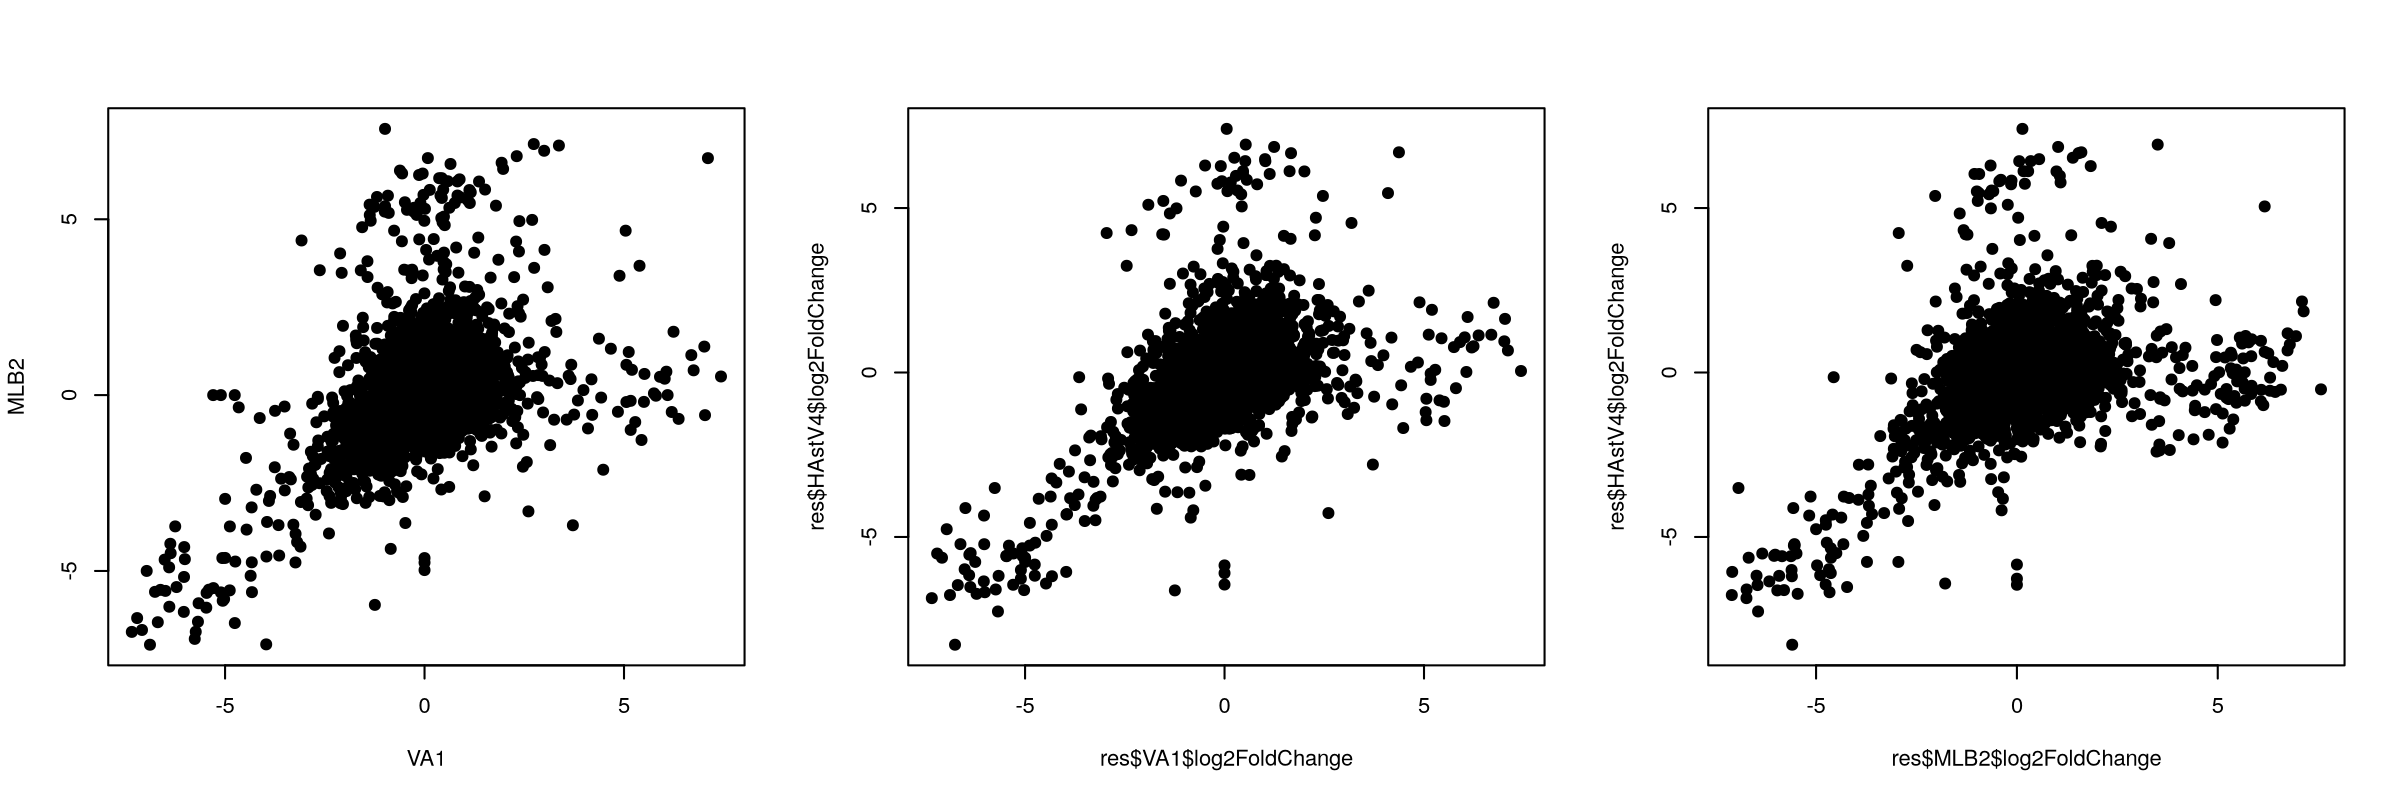

In [66]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
par(mfrow=c(1,3))
plot(res$VA1$log2FoldChange,res$MLB2$log2FoldChange,pch=19,xlab='VA1',ylab='MLB2')
plot(res$VA1$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)
plot(res$MLB2$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)

In [70]:
f = res$MLB2$log2FoldChange>5 & res$VA1$log2FoldChange>5
sel = res$VA1[f,]
cbind(sel,ggenes[rownames(sel),'gene_name'])

DataFrame with 1 row and 7 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000124253   9.10517        7.10345   4.78983   1.48303  0.138067
                     padj ggenes[rownames(sel), "gene_name"]
                <numeric>                        <character>
ENSG00000124253         1                               PCK1

**one by one virus**

In [82]:
cnds = c('MLB2','VA1','HAstV4')
res2 = lapply(cnds,function(c){
    f = bsamples$condition %in% c('Mock',c)
    x = DESeqDataSetFromMatrix(countData = bpccounts[rownames(deseq),f],
                              colData = bsamples[f,],
                               design = ~ condition)
    x = DESeq(x)
    results(x,contrast = c('condition','Mock',c))
    })
names(res2) = cnds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [78]:
sapply(res2,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>0,na.rm=T))
})

MLB2.sign    VA1.sign HAstV4.sign 
          7           0           2

In [80]:
lapply(res2,function(x){
    f = x$padj<0.05 & abs(x$log2FoldChange)>0
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

$MLB2
                  baseMean log2FoldChange         padj gene_name
ENSG00000120549   50.11983     -4.3107052 9.116530e-03  KIAA1217
ENSG00000113916  329.08347     -1.7771185 9.116530e-03      BCL6
ENSG00000175745 2845.38028     -1.3114488 2.855825e-10     NR2F1
ENSG00000185551  784.99483     -1.2094494 1.251884e-02     NR2F2
ENSG00000155760  743.14437     -1.1657653 1.612199e-02      FZD7
ENSG00000076356  866.34010     -0.9563526 1.251884e-02    PLXNA2
ENSG00000150471 1322.71527     -0.8491035 1.694817e-02    ADGRL3

$VA1
[1] baseMean       log2FoldChange padj           gene_name     
<0 rows> (or 0-length row.names)

$HAstV4
                 baseMean log2FoldChange        padj gene_name
ENSG00000134996  29.80181      -8.276538 0.026715567     OSTF1
ENSG00000168298 260.86893       1.967433 0.003780188      H1-4

In [81]:
lapply(res,function(x){
    f = x$padj<0.05 & abs(x$log2FoldChange)>1
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

$MLB2
                baseMean log2FoldChange      padj gene_name
ENSG00000120549 56.63175      -4.308327 0.0439467  KIAA1217

$VA1
[1] baseMean       log2FoldChange padj           gene_name     
<0 rows> (or 0-length row.names)

$HAstV4
                 baseMean log2FoldChange        padj gene_name
ENSG00000134996  22.01903      -8.276014 0.011766177     OSTF1
ENSG00000117707  71.74382      -2.909794 0.011766177     PROX1
ENSG00000168298 251.87897       1.967959 0.001240352      H1-4

#res and res2 - data from "all virus together' and "one virus by one"

In [15]:
#pdf('../../figures/brain/03_brain_human_heatmap.pdf',w=8,h=8.5)
cor = cor(counts(deseq),method = 'sp')
#cor = cor(vsd@assays@data[[1]],method = 'p')
heatmap(cor,distfun = function(x)as.dist(1-x),symm = TRUE,margins = c(12,12))
#dev.off()

pdf 
  2